In [19]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver, common
from tqdm.auto import tqdm

import numpy as np
import pandas as pd
import os, sys
import urllib
import time

# selenium 開關
option = webdriver.ChromeOptions()
option.add_argument('headless')

In [12]:
!pip install webdriver_manager

In [13]:
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 87.0.4280
[WDM] - Get LATEST driver version for 87.0.4280


[WDM] - There is no [win32] chromedriver for browser 87.0.4280 in cache
[WDM] - Get LATEST driver version for 87.0.4280
[WDM] - Trying to download new driver from https://chromedriver.storage.googleapis.com/87.0.4280.88/chromedriver_win32.zip
[WDM] - Driver has been saved in cache [C:\Users\christopher\.wdm\drivers\chromedriver\win32\87.0.4280.88]


In [22]:
def yahoo_movie(url):
    
    # open selenium
#    driver = webdriver.Chrome(ChromeDriverManager().install())
    driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)
    driver.get(url)
    driver.find_element_by_xpath('//*[@id="content_l"]/div[1]/div[1]/ul/li[6]/a').click()
    
    # empty list
    comment = []
    rating = []

    # let's get it start !
    time.sleep(3)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    page = int(soup.select('li a')[-2].text)

    tstart = time.time() 

    for i in range(page-1):

        # when element.click, need to sleep for loading
        time.sleep(3)
        soup = BeautifulSoup(driver.page_source, 'html.parser')

        forms = soup.find_all(name = 'input', attrs={'name':'score'})
        for x in range(1,11):    
            ##  parsing error
            try :
                rating.append(forms[x].attrs['value'])

            except IndexError :
                time.sleep(3)
                soup = BeautifulSoup(driver.page_source, 'html.parser')
                forms = soup.find_all(name = 'input', attrs={'name':'score'}) 

                rating.append(forms[x].attrs['value'])

        co = soup.select('form.form_good span')  
        for y in range(2,30,3):    
            ##  parsing error
            try :
                comment.append(co[y].text)

            except IndexError :
                time.sleep(3)
                soup = BeautifulSoup(driver.page_source, 'html.parser')
                co = soup.select('form.form_good span') 

                comment.append(co[y].text)

        try :
            element = driver.find_element_by_css_selector('#content_l > div.page_numbox > ul > li.nexttxt > a')
            driver.execute_script("arguments[0].click();", element)
        except :
            print('last page')

    ## last page

    time.sleep(3)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    forms = soup.find_all(name = 'input', attrs={'name':'score'})
    co = soup.select('form.form_good span') 

    for i in range(1,len(forms)):
        rating.append(forms[i].attrs['value'])

    for i in range(2,len(co),3):
        comment.append(co[i].text)

    tend = time.time()
    run_time = tend - tstart
    
    ## Dataframe
    df1 = pd.DataFrame({'rating': rating,
                        'comment': comment})

    print('Finish !\nIt runs %.4f sec' % run_time)
    print('-------------------------------------------------------')
    print('Pages: {0:.0f} \nComment: {1:.0f}\nRatting: {2:.0f}'.format(page, len(comment), len(rating)))
    print('-------------------------------------------------------')
    print('you can print df1, comment, and rating to see the result')
    
    return(df1)

# Catch

```
2020年國片 資料截至2021/02/28
參考網址:https://loory.tw/2020-taiwan-movies/
```

## 戀愛好好說

In [23]:
url1 = 'https://movies.yahoo.com.tw/movieinfo_main/%E6%88%80%E6%84%9B%E5%A5%BD%E5%A5%BD%E8%AA%AA-love-talk-10964'
test1 = yahoo_movie(url1)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


ValueError: invalid literal for int() with base 10: '檢舉'

## 同學麥娜絲

In [24]:
url2 = 'https://movies.yahoo.com.tw/movieinfo_main/%E5%90%8C%E5%AD%B8%E9%BA%A5%E5%A8%9C%E7%B5%B2-classmates-minus-10935'
test2 = yahoo_movie(url2)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


Finish !
It runs 51.9758 sec
-------------------------------------------------------
Pages: 11 
Comment: 109
Ratting: 109
-------------------------------------------------------
you can print df1, comment, and rating to see the result


## 媽!我阿榮啦

In [25]:
url3 = 'https://movies.yahoo.com.tw/movieinfo_main/%E5%AA%BD-%E6%88%91%E9%98%BF%E6%A6%AE%E5%95%A6-eclipse-10646'
test3 = yahoo_movie(url3)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


ValueError: invalid literal for int() with base 10: '檢舉'

## 驚夢49天

In [26]:
url4 = 'https://movies.yahoo.com.tw/movieinfo_main/%E9%A9%9A%E5%A4%A249%E5%A4%A9-49-days-10696'
test4 = yahoo_movie(url4)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


Finish !
It runs 19.2657 sec
-------------------------------------------------------
Pages: 3 
Comment: 22
Ratting: 22
-------------------------------------------------------
you can print df1, comment, and rating to see the result


## 破處

In [27]:
url5 = 'https://movies.yahoo.com.tw/movieinfo_main/%E7%A0%B4%E8%99%95-leaving-virginia-10641'
test5 = yahoo_movie(url5)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


Finish !
It runs 37.9399 sec
-------------------------------------------------------
Pages: 9 
Comment: 88
Ratting: 88
-------------------------------------------------------
you can print df1, comment, and rating to see the result


## 打噴嚏

In [28]:
url6 = 'https://movies.yahoo.com.tw/movieinfo_main/%E6%89%93%E5%99%B4%E5%9A%8F-a-choo-5350'
test6 = yahoo_movie(url6)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


Finish !
It runs 63.7790 sec
-------------------------------------------------------
Pages: 15 
Comment: 145
Ratting: 145
-------------------------------------------------------
you can print df1, comment, and rating to see the result


## 野雀之師

In [29]:
url7 = 'https://movies.yahoo.com.tw/movieinfo_main/%E9%87%8E%E9%9B%80%E4%B9%8B%E8%A9%A9-wild-sparrow-10808'
test7 = yahoo_movie(url7)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


ValueError: invalid literal for int() with base 10: '時刻表'

## 怪胎

In [30]:
url8 = 'https://movies.yahoo.com.tw/movieinfo_main/%E6%80%AA%E8%83%8E-i-weir-do-10733'
test8 = yahoo_movie(url8)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


Finish !
It runs 38.6331 sec
-------------------------------------------------------
Pages: 8 
Comment: 78
Ratting: 78
-------------------------------------------------------
you can print df1, comment, and rating to see the result


## 哈囉少女

In [31]:
url9 = 'https://movies.yahoo.com.tw/movieinfo_main/%E5%93%88%E5%9B%89%E5%B0%91%E5%A5%B3-girls-revenge-10780'
test9 = yahoo_movie(url9)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


Finish !
It runs 7.3373 sec
-------------------------------------------------------
Pages: 2 
Comment: 16
Ratting: 16
-------------------------------------------------------
you can print df1, comment, and rating to see the result


## 阿紫

In [32]:
url10 = 'https://movies.yahoo.com.tw/movieinfo_main/%E9%98%BF%E7%B4%AB-the-good-daughter-10828'
test10= yahoo_movie(url10)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


ValueError: invalid literal for int() with base 10: '\n                  熱門'

## 逆者

In [33]:
url11 = 'https://movies.yahoo.com.tw/movieinfo_main/%E9%80%86%E8%80%85-the-road-less-traveled-10875'
test11 = yahoo_movie(url11)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


ValueError: invalid literal for int() with base 10: '檢舉'

## 逃出立法院

In [34]:
url12 = 'https://movies.yahoo.com.tw/movieinfo_main/%E9%80%83%E5%87%BA%E7%AB%8B%E6%B3%95%E9%99%A2-get-the-hell-out-10535'
test12 = yahoo_movie(url12)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


Finish !
It runs 83.7147 sec
-------------------------------------------------------
Pages: 15 
Comment: 146
Ratting: 146
-------------------------------------------------------
you can print df1, comment, and rating to see the result


## 我的兒子是死刑犯

In [35]:
url13 = 'https://movies.yahoo.com.tw/movieinfo_main/%E6%88%91%E7%9A%84%E5%85%92%E5%AD%90%E6%98%AF%E6%AD%BB%E5%88%91%E7%8A%AF-me-and-my-condemned-son-10782'
test13 = yahoo_movie(url13)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


ValueError: invalid literal for int() with base 10: '檢舉'

## 可不可以，你也剛好喜歡我

In [36]:
url14 = 'https://movies.yahoo.com.tw/movieinfo_main/%E5%8F%AF%E4%B8%8D%E5%8F%AF%E4%BB%A5-%E4%BD%A0%E4%B9%9F%E5%89%9B%E5%A5%BD%E5%96%9C%E6%AD%A1%E6%88%91-do-you-love-me-as-i-love-you-10473'
test14 = yahoo_movie(url14)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


Finish !
It runs 187.5895 sec
-------------------------------------------------------
Pages: 43 
Comment: 426
Ratting: 426
-------------------------------------------------------
you can print df1, comment, and rating to see the result


## 初心

In [37]:
url15 = 'https://movies.yahoo.com.tw/movieinfo_main/%E5%88%9D%E5%BF%83-andre-his-olive-tree-10837'
test15 = yahoo_movie(url15)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


Finish !
It runs 7.3670 sec
-------------------------------------------------------
Pages: 2 
Comment: 11
Ratting: 11
-------------------------------------------------------
you can print df1, comment, and rating to see the result


## 馗降：粽邪2

In [38]:
url16 = 'https://movies.yahoo.com.tw/movieinfo_main/%E9%A6%97%E9%99%8D-%E7%B2%BD%E9%82%AA2-the-rope-curse-2-10787'
test16 = yahoo_movie(url16)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


Finish !
It runs 107.1340 sec
-------------------------------------------------------
Pages: 24 
Comment: 240
Ratting: 240
-------------------------------------------------------
you can print df1, comment, and rating to see the result


## 海霧

In [39]:
url17 = 'https://movies.yahoo.com.tw/movieinfo_main/%E6%B5%B7%E9%9C%A7-abyssal-10872'
test17 = yahoo_movie(url17)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


Finish !
It runs 66.8030 sec
-------------------------------------------------------
Pages: 16 
Comment: 157
Ratting: 157
-------------------------------------------------------
you can print df1, comment, and rating to see the result


## 消失的情人節

In [40]:
url18 = 'https://movies.yahoo.com.tw/movieinfo_main/%E6%B6%88%E5%A4%B1%E7%9A%84%E6%83%85%E4%BA%BA%E7%AF%80-my-missing-valentins-10870'
test18 = yahoo_movie(url18)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


Finish !
It runs 61.0558 sec
-------------------------------------------------------
Pages: 14 
Comment: 140
Ratting: 140
-------------------------------------------------------
you can print df1, comment, and rating to see the result


## 惡之畫

In [41]:
url19 = 'https://movies.yahoo.com.tw/movieinfo_main/%E6%83%A1%E4%B9%8B%E7%95%AB-the-painting-of-evil-10913'
test19 = yahoo_movie(url19)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


ValueError: invalid literal for int() with base 10: '檢舉'

## 刻在你心底的名字

In [42]:
url20 = 'https://movies.yahoo.com.tw/movieinfo_main/%E5%88%BB%E5%9C%A8%E4%BD%A0%E5%BF%83%E5%BA%95%E7%9A%84%E5%90%8D%E5%AD%97-your-name-engraved-herein-10902'
test20 = yahoo_movie(url20)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


Finish !
It runs 106.0133 sec
-------------------------------------------------------
Pages: 26 
Comment: 256
Ratting: 256
-------------------------------------------------------
you can print df1, comment, and rating to see the result


## 千年一問

In [43]:
url21 = 'https://movies.yahoo.com.tw/movieinfo_main/%E5%8D%83%E5%B9%B4%E4%B8%80%E5%95%8F-chen-uen-10948'
test21 = yahoo_movie(url21)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


ValueError: invalid literal for int() with base 10: '檢舉'

## 你的情歌

In [44]:
url22 = 'https://movies.yahoo.com.tw/movieinfo_main/%E4%BD%A0%E7%9A%84%E6%83%85%E6%AD%8C-your-love-song-10407'
test22 = yahoo_movie(url22)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


Finish !
It runs 125.7565 sec
-------------------------------------------------------
Pages: 28 
Comment: 276
Ratting: 276
-------------------------------------------------------
you can print df1, comment, and rating to see the result


## 女鬼橋

In [45]:
url23 = 'https://movies.yahoo.com.tw/movieinfo_main/%E5%A5%B3%E9%AC%BC%E6%A9%8B-the-bridge-curse-10437'
test23 = yahoo_movie(url23)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


Finish !
It runs 75.2007 sec
-------------------------------------------------------
Pages: 17 
Comment: 170
Ratting: 170
-------------------------------------------------------
you can print df1, comment, and rating to see the result


## 狂飆一夢

In [46]:
url24 = 'https://movies.yahoo.com.tw/movieinfo_main/%E7%8B%82%E9%A3%86%E4%B8%80%E5%A4%A2-the-price-of-democracy-10506'
test24 = yahoo_movie(url24)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


ValueError: invalid literal for int() with base 10: '檢舉'

## 戀愛iNG

In [47]:
url25 = 'https://movies.yahoo.com.tw/movieinfo_main/%E7%B7%B4%E6%84%9BiNG-acting-out-of-love-10442'
test25 = yahoo_movie(url25)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


Finish !
It runs 33.2276 sec
-------------------------------------------------------
Pages: 8 
Comment: 76
Ratting: 76
-------------------------------------------------------
you can print df1, comment, and rating to see the result


## 老娘就要這麼活

In [48]:
url26 = 'https://movies.yahoo.com.tw/movieinfo_main/%E8%80%81%E5%A8%98%E5%B0%B1%E8%A6%81%E9%80%99%E9%BA%BC%E6%B4%BB-lala-every-you-10611'
test26 = yahoo_movie(url26)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


Finish !
It runs 18.0438 sec
-------------------------------------------------------
Pages: 4 
Comment: 40
Ratting: 40
-------------------------------------------------------
you can print df1, comment, and rating to see the result


## 蚵豐村

In [49]:
url27 = 'https://movies.yahoo.com.tw/movieinfo_main/%E8%9A%B5%E8%B1%90%E6%9D%91-ohong-village-10688'
test27 = yahoo_movie(url27)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


ValueError: invalid literal for int() with base 10: '檢舉'

## 菠蘿蜜

In [50]:
url28 = 'https://movies.yahoo.com.tw/movieinfo_main/%E8%8F%A0%E8%98%BF%E8%9C%9C-boluomi-10412'
test28 = yahoo_movie(url28)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


ValueError: invalid literal for int() with base 10: '時刻表'

## 孤味

In [51]:
url29 = 'https://movies.yahoo.com.tw/movieinfo_main/%E5%AD%A4%E5%91%B3-little-big-women-10477'
test29 = yahoo_movie(url29)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


Finish !
It runs 83.8300 sec
-------------------------------------------------------
Pages: 18 
Comment: 176
Ratting: 176
-------------------------------------------------------
you can print df1, comment, and rating to see the result


## 親愛的房客

In [52]:
url30 = 'https://movies.yahoo.com.tw/movieinfo_main/%E8%A6%AA%E6%84%9B%E7%9A%84%E6%88%BF%E5%AE%A2-dear-tenant-10707'
test30 = yahoo_movie(url30)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


Finish !
It runs 28.6271 sec
-------------------------------------------------------
Pages: 7 
Comment: 67
Ratting: 67
-------------------------------------------------------
you can print df1, comment, and rating to see the result


## 無聲

In [53]:
url31 = 'https://movies.yahoo.com.tw/movieinfo_main/%E7%84%A1%E8%81%B2-the-silent-forest-10926'
test31 = yahoo_movie(url31)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


Finish !
It runs 39.0567 sec
-------------------------------------------------------
Pages: 8 
Comment: 74
Ratting: 74
-------------------------------------------------------
you can print df1, comment, and rating to see the result


## 杏林醫院

In [54]:
url32 = 'https://movies.yahoo.com.tw/movieinfo_main/%E7%84%A1%E8%81%B2-the-silent-forest-10926'
test32 = yahoo_movie(url32)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


Finish !
It runs 36.4162 sec
-------------------------------------------------------
Pages: 8 
Comment: 74
Ratting: 74
-------------------------------------------------------
you can print df1, comment, and rating to see the result


## 腿

In [55]:
url33 = 'https://movies.yahoo.com.tw/movieinfo_main/%E8%85%BF-a-leg-10934'
test33 = yahoo_movie(url33)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


Finish !
It runs 41.2294 sec
-------------------------------------------------------
Pages: 9 
Comment: 81
Ratting: 81
-------------------------------------------------------
you can print df1, comment, and rating to see the result


## 親愛的殺手

In [56]:
url34 = 'https://movies.yahoo.com.tw/movieinfo_main/%E8%A6%AA%E6%84%9B%E7%9A%84%E6%AE%BA%E6%89%8B-be-alive-just-like-you-10861'
test34 = yahoo_movie(url34)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


Finish !
It runs 8.2973 sec
-------------------------------------------------------
Pages: 2 
Comment: 13
Ratting: 13
-------------------------------------------------------
you can print df1, comment, and rating to see the result


## 迷走廣州

In [57]:
url35 = 'https://movies.yahoo.com.tw/movieinfo_main/%E8%BF%B7%E8%B5%B0%E5%BB%A3%E5%B7%9E-mickey-on-the-road-11060'
test35 = yahoo_movie(url35)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


ValueError: invalid literal for int() with base 10: '\n                  熱門'

## 十二夜2：回到第零天

In [58]:
url36 = 'https://movies.yahoo.com.tw/movieinfo_main/%E5%8D%81%E4%BA%8C%E5%A4%9C2-%E5%9B%9E%E5%88%B0%E7%AC%AC%E9%9B%B6%E5%A4%A9-twelve-nights-2-back-to-day-zero-11035'
test36 = yahoo_movie(url36)

<ipython-input-22-91a42dcf71e5>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(r'D:\chromedriver.exe',chrome_options=option)


Finish !
It runs 7.3881 sec
-------------------------------------------------------
Pages: 2 
Comment: 17
Ratting: 17
-------------------------------------------------------
you can print df1, comment, and rating to see the result


# 預處理

In [69]:
import re
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns <3
%matplotlib inline 

SyntaxError: invalid syntax (<ipython-input-69-5b641997c6d9>, line 4)

In [60]:
final = pd.concat([test2, test4, test5, test6, test8, test9, test12, test14, test15, test16, test17, test18, test20, test22, test23, test25, test26, test29, test30, test31, test32, test33, test34, test36], axis=0)
final = final.reset_index(drop=True)
final

,rating,comment
0,1,真的超級難看，沒頭沒尾，沒有重點，沒有結局，劇情莫名其妙，拉低國片的水準。 這部內容應該是市...
1,1,不虧是金馬黃導的片，低俗，下流，沒頭沒尾。\n推薦時間很多的人來看
2,2,超無聊的......................................
3,5,明明一樣超好笑的啊 比較草根性的人比較會有感覺 這才是正港的台灣國片
4,1,我很難理解這部片入圍最佳劇情長片，大部分的笑點都令人尷尬，糟蹋一票好演員。無聲和腿(腿令人驚...
...,...,...
2893,5,這集恐怖的點，在於老一輩可怕的飼養觀念，以及第一線人員受到的刁難與艱辛。真的，心很酸。
2894,5,真的很棒，影片在談論的議題、許多人的努力，非常值得一看！
2895,4,領養代替購買 節育代替撲殺，除了是口號、觀念外，也是要長久持續的進行
2896,5,很感動，向這些為動物、社會努力的人致敬，儘管我們市井小民或許很難直接的出一份心力，但我想只要...


Text(0.5, 1.0, '所有評論分布狀況')

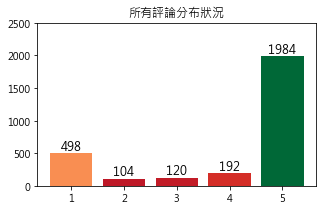

In [76]:
labels = ['1', '2', '3', '4', '5']
x = final.iloc[:,0]
ratings = [sum(x=='1'), sum(x=='2'), sum(x=='3'), sum(x=='4'), sum(x=='5')]

plt.figure(figsize=(5,3))

#根據數值上不同顏色
col = np.array(ratings)/max(ratings)
col = plt.cm.RdYlGn(col)

plt.bar(labels, ratings, color=col)

plt.ylim([0,2500]) # y軸範圍

#修改座標名稱
plt.xticks(np.arange(5), labels=labels)

rects = plt.bar(labels, ratings, color=col)
for rect in rects:  #rects 是三根柱子的集合
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height), size=12, ha='center', va='bottom')

    
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('所有評論分布狀況')

In [62]:
print('1:',sum(x=='1'))
print('2:',sum(x=='2'))
print('3:',sum(x=='3'))
print('4:',sum(x=='4'))
print('5:',sum(x=='5'))

1: 498
2: 104
3: 120
4: 192
5: 1984


# Output

In [64]:
def OutputCSV(data, name):   
    Result = 'D:\desktop\論文\\' + str(name) + '.csv'
    data.to_csv(Result, index=False, encoding='utf_8_sig')
    print( '成功產出' + Result )

In [65]:
OutputCSV(final, 'yahoo_movie0228')

成功產出D:\desktop\論文\yahoo_movie0228.csv
